# Conifer synthesis: 5 parameter GradientBoost BDT 

In [1]:
import conifer
import datetime
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import pickle
import os
current_dir = os.path.dirname(os.getcwd())
current_dir

'/home/elham/TauClassification_projets/TauClassifier/ml-tau-classifier'

## Load the inputs

In [2]:
# Only 5 variables are used for training the BDT
# Input variables: ['reco_pt', 'reco_eta', 'reco_frac2', 'reco_max1', 'reco_max2']

X_train = np.load(current_dir+"/data/X_train.npy")
Y_train = np.load(current_dir+"/data/Y_train.npy")
print("---- Training set ----")
print("Input shape: ", X_train.shape)
print("Target shape: ", Y_train.shape)

print("\n")

X_test = np.load(current_dir+"/data/X_test.npy")
Y_test = np.load(current_dir+"/data/Y_test.npy")
print("---- Testing set ----")
print("Input shape: ", X_test.shape)
print("Target shape: ", Y_test.shape)

---- Training set ----
Input shape:  (2375276, 5)
Target shape:  (2375276, 1)


---- Testing set ----
Input shape:  (263920, 5)
Target shape:  (263920, 1)


## Plotting the input features

 ### Reconstructed $p_{T}$

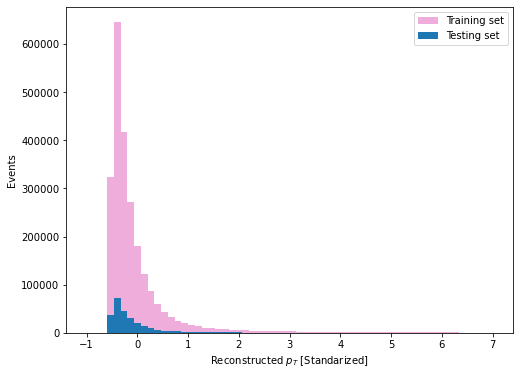

In [3]:
fig = plt.figure(figsize=(8, 6))
plt.hist(X_train[:,0], bins = 60, range = (-1, 7), color="tab:pink", alpha = 0.6, label="Training set")
plt.hist(X_test[:,0], bins = 60, range = (-1, 7), color="tab:blue", alpha = 1, label="Testing set")
plt.xlabel("Reconstructed $p_{T}$ [Standarized]")
plt.ylabel("Events")
plt.legend()
plt.show()
fig.savefig("../plots/reco_pt.pdf")

### Reconstructed $\eta$

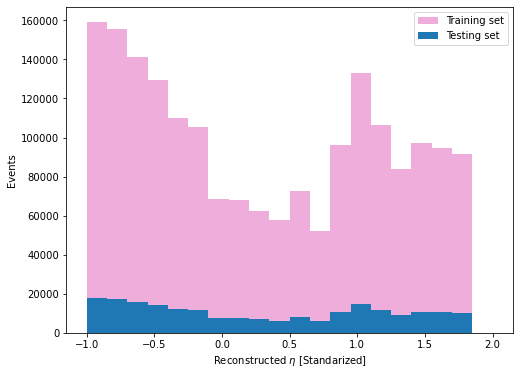

In [4]:
fig = plt.figure(figsize=(8, 6))
plt.hist(X_train[:,1], bins = 20, range = (-1, 2), color="tab:pink", alpha = 0.6, label="Training set")
plt.hist(X_test[:,1], bins = 20, range = (-1, 2), color="tab:blue", alpha = 1, label="Testing set")
plt.xlabel("Reconstructed $\eta$ [Standarized]")
plt.ylabel("Events")
plt.legend()
plt.show()
fig.savefig("../plots/reco_eta.pdf")

### Reconstructed Frac2

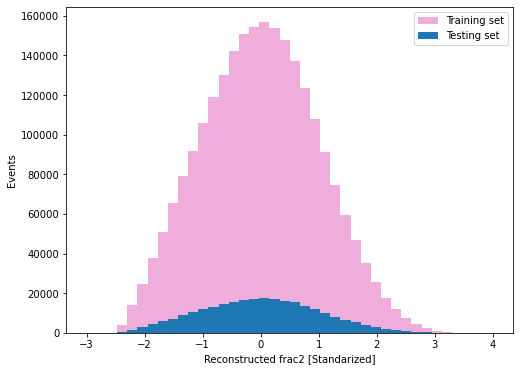

In [5]:
fig = plt.figure(figsize=(8, 6))
plt.hist(X_train[:,2], bins = 40, range = (-3, 4), color="tab:pink", alpha = 0.6, label="Training set")
plt.hist(X_test[:,2], bins = 40, range = (-3, 4), color="tab:blue", alpha = 1, label="Testing set")
plt.xlabel("Reconstructed frac2 [Standarized]")
plt.ylabel("Events")
plt.legend()
plt.show()
fig.savefig("../plots/reco_frac2.pdf")

### Reconstructed max1

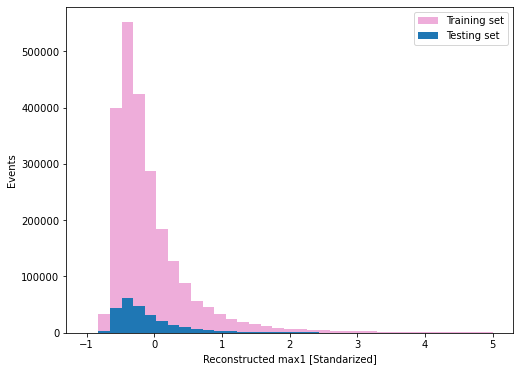

In [6]:
fig = plt.figure(figsize=(8, 6))
plt.hist(X_train[:,3], bins = 35, range = (-1, 5), color="tab:pink", alpha = 0.6, label="Training set")
plt.hist(X_test[:,3], bins = 35, range = (-1, 5), color="tab:blue", alpha = 1, label="Testing set")
plt.xlabel("Reconstructed max1 [Standarized]")
plt.ylabel("Events")
plt.legend()
plt.show()
fig.savefig("../plots/reco_max1.pdf")

### Reconstructed max2

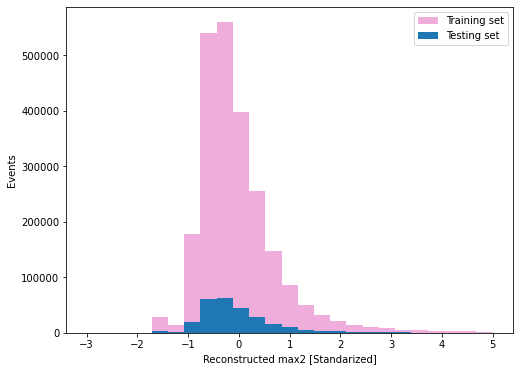

In [7]:
fig = plt.figure(figsize=(8, 6))
plt.hist(X_train[:,4], bins = 25, range = (-3, 5), color="tab:pink", alpha = 0.6, label="Training set")
plt.hist(X_test[:,4], bins = 25, range = (-3, 5), color="tab:blue", alpha = 1, label="Testing set")
plt.xlabel("Reconstructed max2 [Standarized]")
plt.ylabel("Events")
plt.legend()
plt.show()
fig.savefig("../plots/reco_max2.pdf")

## Loading the trained BDT model

In [8]:
with open(current_dir+'/models/scaled_100_4_model.pkl', 'rb') as f:
    clf = pickle.load(f)
clf

/home/elham/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/elham/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/elham/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


GradientBoostingClassifier(max_depth=4)

## Visualize the BDT model

In [9]:
from sklearn.tree import export_graphviz
# Get the tree number 42
sub_tree_42 = clf.estimators_[42, 0]
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_pdf(current_dir+"/models/scaled_100_4_model.pdf")

True

## Calculate the accuracy of the BDT model

In [5]:
from sklearn.metrics import accuracy_score
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(Y_test, y_predict)))

Accuracy: 0.9760533494998485


### Sklearn decision_function vs predict

In [22]:
y_score = clf.decision_function(X_test)
y_score[10:50]

array([-5.32958832, -5.55777954, -4.78904887, -5.81979663, -4.81836544,
       -5.69867906, -4.98317917, -6.08337315, -3.50458139, -1.57947402,
       -3.70044037, -6.0875411 , -4.70635456, -1.50078041, -4.93522479,
       -5.89286814, -5.70336738, -5.49362978, -5.93345441, -5.50396173,
       -4.04523401, -3.88036754, -5.76239032, -5.76872237, -6.32109516,
       -5.77973655, -5.54011048, -2.04333229, -6.344957  , -5.1898336 ,
       -6.18973719, -5.24735491, -6.21255865, -5.24179647, -6.16897151,
       -6.00590897,  1.18216585, -0.62421868, -3.16153   , -3.7205456 ])

In [25]:
clf.predict(X_test)[10:50]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0.])

## BDT model ROC curve

In [6]:
def get_auc_roc(y_test, y_model):
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_model)
    roc_auc = sklearn.metrics.auc(fpr, tpr)

    return tpr, fpr, roc_auc

In [7]:
y_sklearn = clf.decision_function(X_test)
tpr, fpr, roc_auc = get_auc_roc(Y_test, y_sklearn)

In [58]:
def plot_roc_curve(tpr_list, fpr_list,roc_auc_list, labels, figname="skmodel" ):
    fig_roc_sklearn = plt.figure(figsize=(8, 6))
    lw=2
    n_curves = len(tpr_list)
    print(n_curves)

    from itertools import cycle
    colors = cycle(['red', 'green', 'cornflowerblue', 'darkorange','aqua', 'green'])
    linestyles = cycle(['solid', 'dashed', 'dotted', 'dashdot'])
    for i, color, linestyle in zip(range(n_curves), colors, linestyles):
        plt.plot(fpr_list[i], tpr_list[i], linestyle = linestyle, color=color, lw=lw,label= labels[i]+' (area = {1:0.2f})'
                 ''.format(i, roc_auc_list[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw, label="Random" )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for BDT Tau Classifier')
    plt.legend(loc="lower right")
    fig_roc_sklearn.savefig(current_dir+"/plots/roc_"+figname+".pdf")
    

1


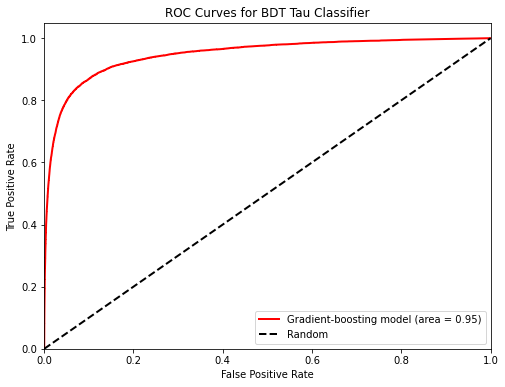

In [9]:
plot_roc_curve([tpr], [fpr], [roc_auc], ["Gradient-boosting model"], "gradboost_model")

## Create a Conifer model

In [11]:
# Create a conifer config
cfg = conifer.backends.vivadohls.auto_config()
# Set the output directory to something unique
cfg['OutputDir'] = 'tauTrees/prj_{}'.format(int(datetime.datetime.now().timestamp()))
cfg['Precision'] = 'ap_fixed<18,8>'
    
# Create and compile the model (vivalo HLS)
conifer_model = conifer.model(clf, conifer.converters.sklearn, conifer.backends.vivadohls, cfg)
conifer_model.compile()

#VHDL model
#model = conifer.model(clf, conifer.converters.sklearn, conifer.backends.vhdl, cfg)
#model.compile()

# Run HLS C Simulation and get the output
y_conif = conifer_model.decision_function(X_test)

# Synthesize the model
conifer_model.build()

## Vivado Report

In [12]:
import hls4ml
hls4ml.report.read_vivado_report(cfg['OutputDir'])


Found 1 solution(s) in tauTrees/prj_1618803538/my_prj_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'my_prj'
* Date:           Sun Apr 18 22:49:46 2021

* Version:        2018.2 (Build 2258646 on Thu Jun 14 20:25:20 MDT 2018)
* Project:        my_prj_prj
* Solution:       solution1
* Product family: virtexuplus
* Target device:  xcvu9p-flgb2104-2L-e


== Performance Estimates
+ Timing (ns): 
    * Summary: 
    +--------+-------+----------+------------+
    |  Clock | Target| Estimated| Uncertainty|
    +--------+-------+----------+------------+
    |ap_clk  |   5.00|     4.620|        0.62|
    +--------+-------+----------+------------+

+ Latency (clock cycles): 
    * Summary: 
    +-----+-----+-----+-----+----------+
    |  Latency  |  Interval | Pipeline |
    | min | max | min | max |   Type   |
    +-----+-----+-----+-----+----------+
    |   59|   59|   50|   50| function |
    +-----+-----+-----+-----+--------

## Profile figures

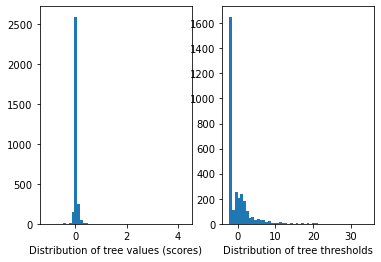

In [53]:
profile_conif_hls = conifer_model.profile()
profile_conif_hls.savefig(current_dir+"/plots/profile_conifer_hls.pdf")

## Conifer model ROC curve

2


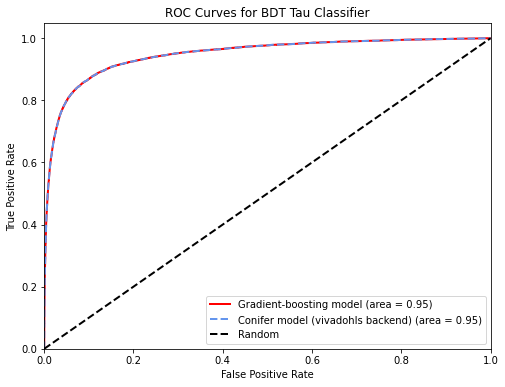

In [15]:
tpr_hls, fpr_hls, roc_auc_hls = get_auc_roc(Y_test, y_conif)
plot_roc_curve([tpr, tpr_hls], [fpr, fpr_hls], [roc_auc, roc_auc_hls], ["Gradient-boosting model", "Conifer model (vivadohls backend)"], "conf_model")
#plot_roc_curve([tpr_hls], [fpr_hls], [roc_auc_hls], ["Gradient-boosting model", "Conifer model (vivadohls backend)"], "conf_model")
#plot_roc_curve([tpr], [fpr], [roc_auc], ["Gradient-boosting model"])

## Background rejection vs signal efficiency

In [55]:
def plot_efficiecny(tpr_list, fpr_list,roc_auc_list, labels, figname="model" ):
    fig_roc_sklearn = plt.figure(figsize=(8, 6))
    lw=2
    n_curves = len(tpr_list)
    print(n_curves)
    
    
    from itertools import cycle
    colors = cycle(['red', 'cornflowerblue', 'green', 'darkorange','aqua'])
    linestyles = cycle(['solid', 'dashed', 'dotted', 'dashdot'])
    for i, color, linestyle in zip(range(n_curves), colors, linestyles):
        plt.plot(tpr_list[i], 1.0/fpr_list[i], linestyle = linestyle, color=color, lw=lw,label= labels[i]+' (area = {1:0.2f})'
                 ''.format(i, roc_auc_list[i]))

    plt.semilogy()
    #plt.xlim([0.0, 1.0])
    #plt.ylim([1e-5, 1.05])
    plt.xlabel('Signal Efficiency')
    plt.ylabel('Background Rejection')
    plt.title('ROC Curves for BDT Tau Classifier')
    plt.legend(loc="upper right")
    fig_roc_sklearn.savefig(current_dir+"/plots/eff_"+figname+".pdf")

2


/home/elham/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/elham/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


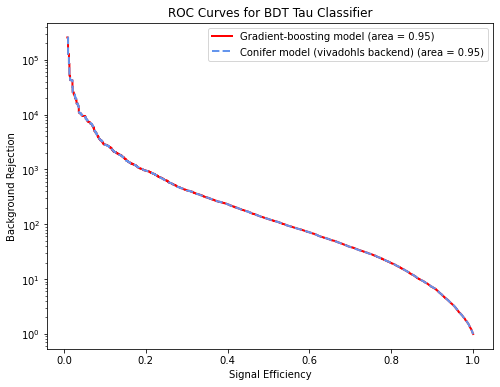

In [40]:
plot_efficiecny([tpr, tpr_hls], [fpr, fpr_hls], [roc_auc, roc_auc_hls], ["Gradient-boosting model", "Conifer model (vivadohls backend)"], "conf_model")

## Conifer model with VHDL backend

In [41]:
# Create a conifer config
cfg = conifer.backends.vhdl.auto_config()
# Set the output directory to something unique
cfg['OutputDir'] = 'tauTrees/prj_vhdl_{}'.format(int(datetime.datetime.now().timestamp()))
cfg['Precision'] = 'ap_fixed<18,8>'
    
# Create and compile the VHDL model
vhdl_model = conifer.model(clf, conifer.converters.sklearn, conifer.backends.vhdl, cfg)
vhdl_model.compile()

# Run HLS C Simulation and get the output
y_conif_vhdl = vhdl_model.decision_function(X_test)

# Synthesize the model
vhdl_model.build()

2


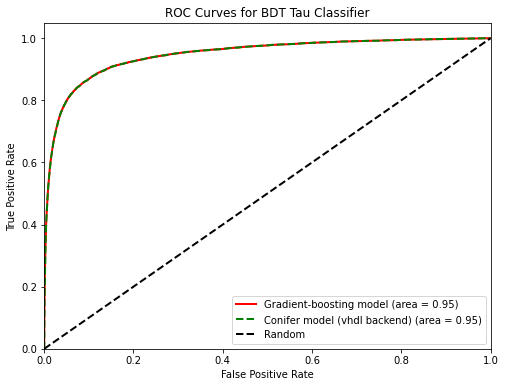

In [59]:
tpr_vhdl, fpr_vhdl, roc_auc_vhdl = get_auc_roc(Y_test, y_conif_vhdl)
plot_roc_curve([tpr, tpr_vhdl], [fpr, fpr_vhdl], [roc_auc, roc_auc_vhdl], ["Gradient-boosting model", "Conifer model (vhdl backend)"], "conf_model_vhdl")


In [45]:
import hls4ml
hls4ml.report.read_vivado_report(cfg['OutputDir'])

Unable to read project data. Exiting.


In [ ]:
##

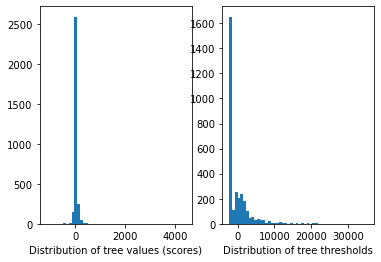

In [54]:
profile_conif_vhdl = vhdl_model.profile()
profile_conif_vhdl.savefig(current_dir+"/plots/profile_conifer_vhdl.pdf")

3


/home/elham/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/elham/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/elham/miniconda3/envs/hls4ml-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


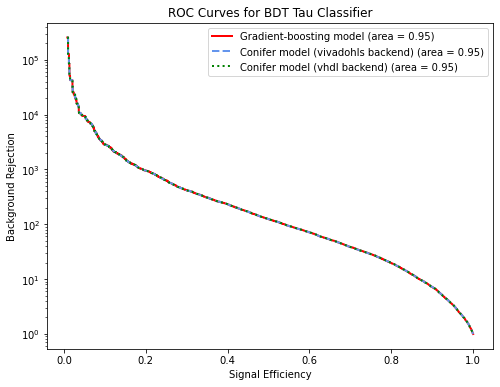

In [57]:
plot_efficiecny([tpr, tpr_hls, tpr_vhdl], [fpr, fpr_hls, fpr_vhdl], [roc_auc, roc_auc_hls, roc_auc_vhdl], ["Gradient-boosting model", "Conifer model (vivadohls backend)", "Conifer model (vhdl backend)"], "compare_conif_bkend")